In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input,Dense,Flatten,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout, Conv1D,Lambda
from keras.models import Model,load_model
import pandas as pd
import keras.backend as K
import h5py
import model_architectures as ma
import utils

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
models_dir = '/content/gdrive/My Drive/Project-EE5611/Model_files/models/scrnn_highsnr/'
feat_file='/content/gdrive/My Drive/Project-EE5611/project_features/base_scrnn_highsnr_features.h5'
fid=h5py.File(feat_file,'r');
x_tr=fid['x_tr']
y_tr=fid['y_tr'] 
snr_tr = np.array(fid['snr_tr'])
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])

In [4]:
m1 = ma.base_scrnn()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 2)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 2)            8         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 124, 128)          1408      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 37, 128)           82048     
_________________________________________________________________
lstm_1 (LSTM)                (None, 37, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 37, 128)           1315

In [0]:
checkpoint = keras.callbacks.ModelCheckpoint(models_dir+"model_epoch-{epoch:02d}_val_acc-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=2, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [6]:
history = m1.fit(x=x_tr,
       y=y_tr,
       validation_data=[x_ts,y_ts],
       batch_size=128,
       epochs=75,
       shuffle='batch',
       callbacks = [checkpoint],
       verbose=1)

Train on 99000 samples, validate on 22000 samples
Epoch 1/75
99000/99000 [==============================] - 42s 420us/step - loss: 0.9561 - accuracy: 0.5780 - val_loss: 2.1554 - val_accuracy: 0.4149

Epoch 00001: saving model to /content/gdrive/My Drive/Project-EE5611/Model_files/models/scrnn_highsnr/model_epoch-01_val_acc-0.41.h5
Epoch 2/75
99000/99000 [==============================] - 27s 269us/step - loss: 0.4861 - accuracy: 0.7644 - val_loss: 2.3689 - val_accuracy: 0.4915

Epoch 00002: saving model to /content/gdrive/My Drive/Project-EE5611/Model_files/models/scrnn_highsnr/model_epoch-02_val_acc-0.49.h5
Epoch 3/75
99000/99000 [==============================] - 28s 284us/step - loss: 0.4481 - accuracy: 0.7775 - val_loss: 2.4997 - val_accuracy: 0.4881

Epoch 00003: saving model to /content/gdrive/My Drive/Project-EE5611/Model_files/models/scrnn_highsnr/model_epoch-03_val_acc-0.49.h5
Epoch 4/75
99000/99000 [==============================] - 28s 283us/step - loss: 0.3651 - accuracy: 0

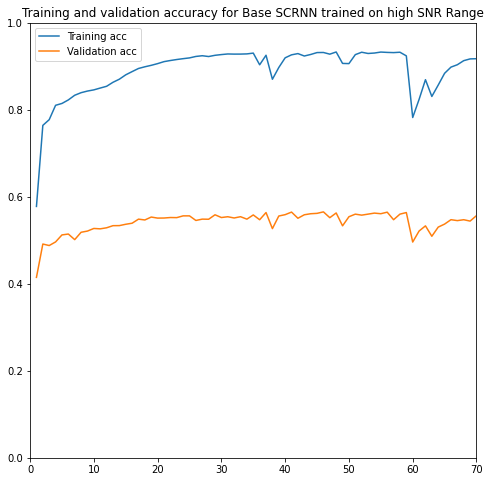

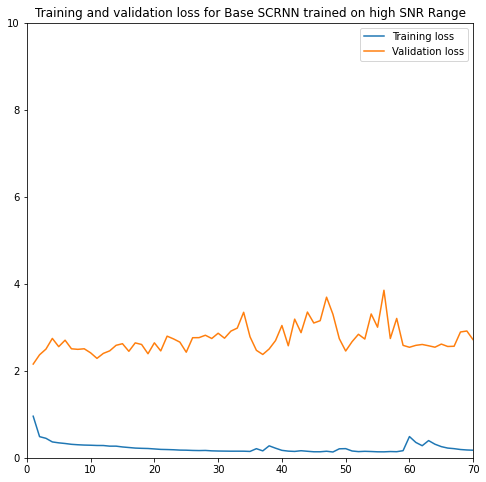

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8,8))
plt.plot(epochs, acc,label='Training acc')
plt.plot(epochs, val_acc,label='Validation acc')
plt.title('Training and validation accuracy for Base SCRNN trained on high SNR Range')
plt.legend()
plt.ylim([0,1])
plt.xlim([0,70])
plt.figure(figsize=(8,8))
plt.plot(epochs, loss,label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss for Base SCRNN trained on high SNR Range')
plt.legend()
plt.ylim([0,10])
plt.xlim([0,70])
plt.show()